In [0]:
import matplotlib.pyplot as plt
import math

In [0]:
def scale_control_points(leg_length, max_foot_displacement):
  control_points_x = [-0.15, -0.2805,-0.3,-0.3,-0.3,   0.0, 0.0 ,   0.0, 0.3032, 0.3032, 0.2826, 0.15]
  control_points_y = [ 0.5,  0.5, 0.3611, 0.3611, 0.3611, 0.3611, 0.3611, 0.3214, 0.3214, 0.3214, 0.5, 0.5]
  total_control_points = len(control_points_x)
  leg_ratio = leg_length / 0.444

  for i in range(12):
      if i == 0:
          control_points_x[i] = -max_foot_displacement / 2.0
      elif i == 11:
          control_points_x[i] = max_foot_displacement / 2.0
      else:
          control_points_x[i] = control_points_x[i] * leg_ratio

      control_points_y[i] = (control_points_y[i] * leg_ratio) - (0.5 * leg_ratio)
      
  return control_points_x, control_points_y

In [81]:
LEG_LENGTH = 0.282
MAX_FOOT_DISPLACEMENT = 0.125
control_points_x, control_points_y = scale_control_points(LEG_LENGTH, MAX_FOOT_DISPLACEMENT)
print("CONTROL POINTS X: {}" .format(control_points_x))
print("CONTROL POINTS Y: {}" .format(control_points_y))

CONTROL POINTS X: [-0.0625, -0.17815540540540542, -0.1905405405405405, -0.1905405405405405, -0.1905405405405405, 0.0, 0.0, 0.0, 0.19257297297297296, 0.19257297297297296, 0.17948918918918919, 0.0625]
CONTROL POINTS Y: [0.0, 0.0, -0.08822027027027027, -0.08822027027027027, -0.08822027027027027, -0.08822027027027027, -0.08822027027027027, -0.11343513513513512, -0.11343513513513512, -0.11343513513513512, 0.0, 0.0]


In [0]:
class TrajectoryPlanner:
    def __init__(self, max_foot_displacement, stance_depth):
        self.max_foot_displacement = max_foot_displacement
        self.stance_depth = stance_depth
        self.control_points_x = [-0.0625, -0.08415, -0.09, -0.09, -0.09, 0.0, 0.0, 0.0, 0.09096, 0.09096, 0.08478000000000001, 0.0625]
        self.control_points_y = [0.0, 0.0, -0.04167, -0.04167, -0.04167, -0.04167, -0.04167, -0.05357999999999999, -0.05357999999999999, -0.05357999999999999, 0.0, 0.0]
        self.total_control_points = len(self.control_points_x)
        self.factorial =  [1.0,1.0,2.0,6.0,24.0,120.0,720.0,5040.0,40320.0,362880.0,3628800.0,39916800.0,479001600.0]
        
        self.control_points_x[0]  = -self.max_foot_displacement / 2
        self.control_points_x[self.total_control_points - 1]  = self.max_foot_displacement / 2
                    
    def generate_swing(self, phase_signal):
        n = self.total_control_points - 1
        x = 0
        y = 0

        for i in range(self.total_control_points):
            coeff = self.factorial[n] / (self.factorial[i] * self.factorial[n - i])

            x = x + (coeff * pow(phase_signal, i) * pow((1 - phase_signal), (n - i)) * self.control_points_x[i])
            y = y + (coeff * pow(phase_signal, i) * pow((1 - phase_signal), (n - i)) * self.control_points_y[i])

        return x, y

    def generate_stance(self, phase_signal):
        x = 0
        y = 0
        x = (self.max_foot_displacement / 2) * (1 - (2 * phase_signal)) 
        y = self.stance_depth * math.cos((3.1416 * x) / self.max_foot_displacement)
        return x, y

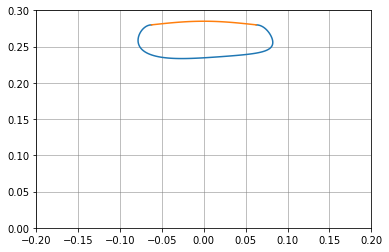

In [83]:
LEG_LENGTH = 0.282
MAX_DISPLACEMENT = 0.125
STANCE_DEPTH = 0.005

swing_x_points = []
swing_y_points = []

stance_x_points = []
stance_y_points = []

tp = TrajectoryPlanner(MAX_DISPLACEMENT, STANCE_DEPTH)
#fig = plt.figure()
#ax = fig.gca(projection='2d')
plt.ylim([0, 0.3])
plt.xlim([-0.2, 0.2])
plt.grid(linestyle='-', linewidth='0.5', color='gray')

for i in range(101):
  phase_magnitude = i / 100
  x_swing, y_swing = tp.generate_swing(phase_magnitude)
  x_stance, y_stance = tp.generate_stance(phase_magnitude)
  ref_x = 0.0
  ref_y = 0.28
  swing_x_points.append(ref_x - x_swing)
  swing_y_points.append(ref_y + y_swing)
  stance_x_points.append(ref_x - x_stance)
  stance_y_points.append(ref_y + y_stance)

plt.plot(swing_x_points, swing_y_points)
plt.plot(stance_x_points, stance_y_points)

plt.show()